In [1]:
!pip install -q -U google-generativeai

In [2]:
import google.generativeai as genai
import pathlib
import textwrap
from IPython.display import display
from IPython.display import Markdown

In [3]:
def to_markdown(text):
  text = text.replace("*"," &")
  return Markdown(textwrap.indent(text,'> ', predicate=lambda _: True))

#Example of useage
input_text = "This is * sample text with bullet points"
result = to_markdown(input_text)
display(result)

> This is  & sample text with bullet points

In [5]:
from google.colab import userdata

In [6]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [8]:
genai.configure(api_key = GOOGLE_API_KEY)

In [9]:
for model in genai.list_models():
  print(model)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

In [10]:
for models in genai.list_models():
  if 'generateContent' in models.supported_generation_methods:
    print(models.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [25]:
#Generate text from input text

model = genai.GenerativeModel('models/gemini-pro')

In [26]:
%%time
response = model.generate_content("what is the meaning of life")

CPU times: user 120 ms, sys: 7.98 ms, total: 128 ms
Wall time: 9.26 s


In [27]:
response.text

'The meaning of life is a profound question that has been pondered by philosophers, theologians, scientists, and artists for millennia. There is no single answer that is universally accepted, as the meaning of life is a deeply personal and subjective experience. However, there are a number of different perspectives on the meaning of life that can provide insight and guidance.\n\n* **Purpose-driven Life:** Many people find meaning in life through a sense of purpose or calling. This could be a career, a hobby, a creative pursuit, or a commitment to a cause or belief. When you feel like you are making a contribution to the world and that your life has a larger purpose, it can bring a sense of fulfillment and meaning.\n* **Relationships:** For many people, the most important meaning in life comes from their relationships with others. This includes family, friends, romantic partners, and even pets. When we connect with others on a deep level, it can bring a sense of love, belonging, and pur

In [18]:
response.parts

[]

In [19]:
response.candidates

[finish_reason: RECITATION
index: 0
]

In [28]:
to_markdown(response.text)

> The meaning of life is a profound question that has been pondered by philosophers, theologians, scientists, and artists for millennia. There is no single answer that is universally accepted, as the meaning of life is a deeply personal and subjective experience. However, there are a number of different perspectives on the meaning of life that can provide insight and guidance.
> 
>  &  & &Purpose-driven Life: & & Many people find meaning in life through a sense of purpose or calling. This could be a career, a hobby, a creative pursuit, or a commitment to a cause or belief. When you feel like you are making a contribution to the world and that your life has a larger purpose, it can bring a sense of fulfillment and meaning.
>  &  & &Relationships: & & For many people, the most important meaning in life comes from their relationships with others. This includes family, friends, romantic partners, and even pets. When we connect with others on a deep level, it can bring a sense of love, belonging, and purpose.
>  &  & &Experiences: & & Some people find meaning in life through new experiences and adventures. This could be traveling to new places, trying new things, or challenging yourself physically or mentally. When we step outside of our comfort zones and embrace new experiences, it can help us grow as individuals and appreciate the wonders of the world around us.
>  &  & &Self-discovery and Growth: & & Others find meaning in life through a journey of self-discovery and personal growth. This could involve learning new things, exploring different parts of your personality, or working on your strengths and weaknesses. When you are committed to your own growth and development, it can lead to a sense of self-awareness, self-acceptance, and fulfillment.
>  &  & &Contribution to Society: & & For many people, the meaning of life comes from making a positive contribution to society. This could be through volunteering, working in a meaningful career, or simply being a kind and compassionate person. When you make a difference in the lives of others, it can bring a sense of purpose and satisfaction.
> 
> Ultimately, the meaning of life is a personal journey that is unique to each individual. There is no right or wrong answer, and what is meaningful to one person may not be meaningful to another. The key is to explore different perspectives, reflect on your own values and beliefs, and find a path that resonates with you.

In [30]:
response.candidates

[content {
  parts {
    text: "The meaning of life is a profound question that has been pondered by philosophers, theologians, scientists, and artists for millennia. There is no single answer that is universally accepted, as the meaning of life is a deeply personal and subjective experience. However, there are a number of different perspectives on the meaning of life that can provide insight and guidance.\n\n* **Purpose-driven Life:** Many people find meaning in life through a sense of purpose or calling. This could be a career, a hobby, a creative pursuit, or a commitment to a cause or belief. When you feel like you are making a contribution to the world and that your life has a larger purpose, it can bring a sense of fulfillment and meaning.\n* **Relationships:** For many people, the most important meaning in life comes from their relationships with others. This includes family, friends, romantic partners, and even pets. When we connect with others on a deep level, it can bring a se

In [31]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [32]:
%%time
response = model.generate_content("What is the meaning of life",stream=True)
for chunk in response:
  print(chunk.text)
  print('_'*80)

The meaning of life is a deep philosophical question that has been pondered by philosophers,
________________________________________________________________________________
 religious leaders, and people around the world for centuries. While it is impossible to provide a single, universally accepted answer to this question, here are some possible perspectives
________________________________________________________________________________
 on the meaning of life:

1. **Purpose and Fulfillment:** For many people, the meaning of life lies in finding a purpose or mission that brings them fulfillment and a sense of accomplishment. This could involve pursuing a career that makes a positive impact on the world, nurturing relationships with loved ones, or engaging in creative
________________________________________________________________________________
 or intellectual activities.

2. **Happiness and Well-being:** Some people believe that the meaning of life is to achieve happiness and we

In [33]:
!curl -o image.jpg https://cdn.loveandlemons.com/wp-content/uploads/2019/07/salad.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  303k  100  303k    0     0   775k      0 --:--:-- --:--:-- --:--:--  776k


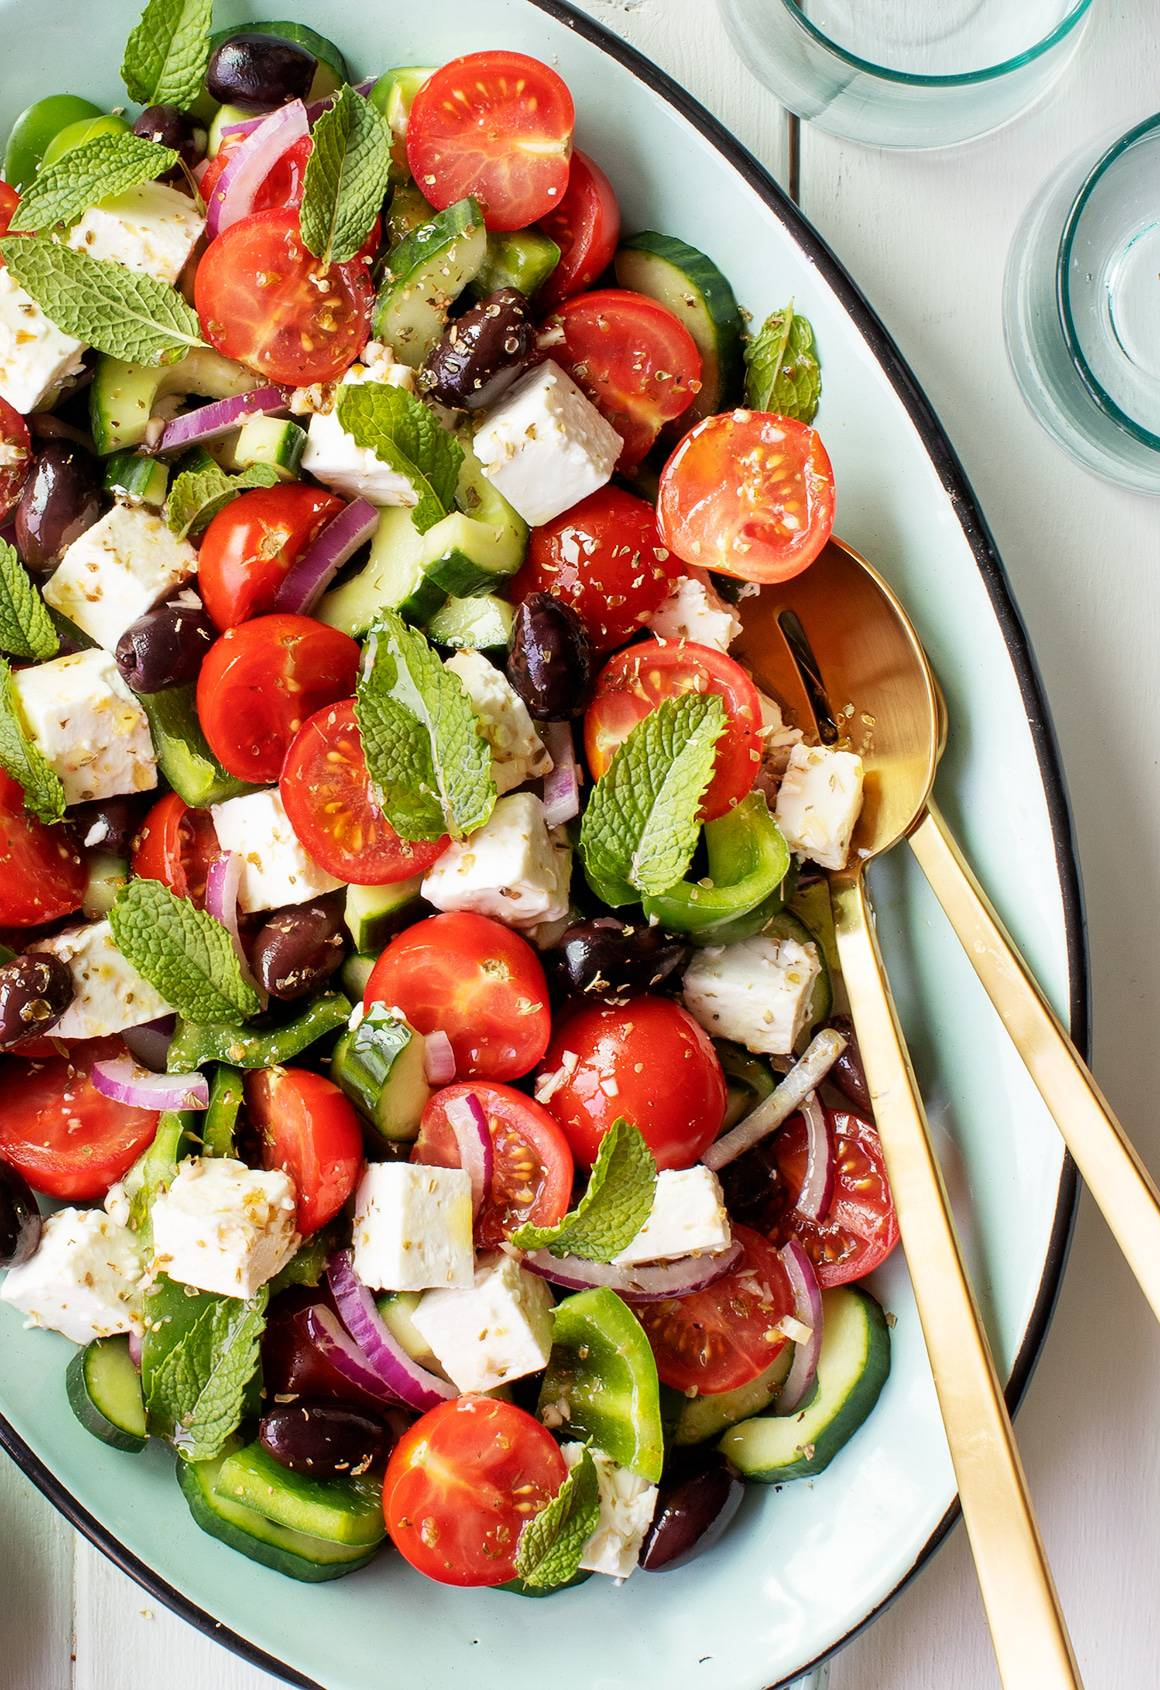

In [34]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [35]:
model2 = genai.GenerativeModel('models/gemini-pro-vision')

In [37]:
%%time
response2 = model2.generate_content(img)



CPU times: user 141 ms, sys: 15.2 ms, total: 156 ms
Wall time: 9.24 s


In [38]:
response2.text

' A Greek salad is a refreshing and flavorful dish that is perfect for a summer meal. It is made with fresh tomatoes, cucumbers, onions, olives, and feta cheese. The salad is dressed with a simple vinaigrette dressing made with olive oil, red wine vinegar, and oregano.\n\nTo make a Greek salad, start by cutting the tomatoes, cucumbers, onions, and olives into small pieces. Then, crumble the feta cheese into small pieces. In a large bowl, combine the tomatoes, cucumbers, onions, olives, and feta cheese.\n\nIn a small bowl, whisk together the olive oil, red wine vinegar, and oregano. Then, pour the dressing over the salad and toss to coat.\n\nServe the Greek salad immediately or chill it for later.'

In [39]:
to_markdown(response2.text)

>  A Greek salad is a refreshing and flavorful dish that is perfect for a summer meal. It is made with fresh tomatoes, cucumbers, onions, olives, and feta cheese. The salad is dressed with a simple vinaigrette dressing made with olive oil, red wine vinegar, and oregano.
> 
> To make a Greek salad, start by cutting the tomatoes, cucumbers, onions, and olives into small pieces. Then, crumble the feta cheese into small pieces. In a large bowl, combine the tomatoes, cucumbers, onions, olives, and feta cheese.
> 
> In a small bowl, whisk together the olive oil, red wine vinegar, and oregano. Then, pour the dressing over the salad and toss to coat.
> 
> Serve the Greek salad immediately or chill it for later.

In [42]:
%%time
response2 = model2.generate_content("Write a short, engaging blog post based on the picture,It should include description")


BadRequest: 400 POST http://localhost:38219/v1beta/models/gemini-pro-vision:generateContent?%24alt=json%3Benum-encoding%3Dint: Add an image to use models/gemini-pro-vision, or switch your model to a text model.